In [6]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

import wave
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from tqdm import tqdm_notebook as tqdm
import tsfresh
from entropy import *
import entropy
from scipy.signal import periodogram, welch
import matplotlib
matplotlib.use('PDF')
plt.style.use('ggplot') 
%matplotlib inline

In [242]:
demo = pd.read_excel('1.xlsx')

In [7]:
path = '/Volumes/TOSHIBA EXT/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'

In [8]:
#https://homepage.univie.ac.at/christian.herbst/python/dsp_util_8py_source.html
#https://core.ac.uk/download/pdf/82343096.pdf
def calculateJitterRatio(data):
    n = len(data)
    sum1 = 0
    sum2 = 0
    for i in range(n):
        if i > 0:
            sum1 += abs(data[i-1] - data[i])
        sum2 += data[i]
    sum1 /= float(n - 1)
    sum2 /= float(n)
    return 1000.0 * sum1 / sum2

def calculateJitterFactor(data):
    n = len(data)
    dataF = np.zeros(n)
    for i in range(n):
    # convert from periods to F0 per cycle
        dataF[i] = 1.0 / data[i]
    sum1 = 0
    sum2 = 0
    for i in range(n):
        if i > 0:
            sum1 += abs(dataF[i] - dataF[i-1])
        sum2 += dataF[i]
    sum1 /= float(n - 1)
    sum2 /= float(n)
    return 100.0 * sum1 / sum2

def calculateJitterPercent(data):
    return calculateJitterRatio(data) / 10.0

In [9]:
#https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html

def spectral_entropy(x, sf=22050, method='fft', nperseg=None, normalize=False):
    """Spectral Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    sf : float
        Sampling frequency
    method : str
        Spectral estimation method ::

        'fft' : Fourier Transform (via scipy.signal.periodogram)
        'welch' : Welch periodogram (via scipy.signal.welch)

    nperseg : str or int
        Length of each FFT segment for Welch method.
        If None, uses scipy default of 256 samples.
    normalize : bool
        If True, divide by log2(psd.size) to normalize the spectral entropy
        between 0 and 1. Otherwise, return the spectral entropy in bit.

    Returns
    -------
    se : float
        Spectral Entropy

    Notes
    -----
    Spectral Entropy is defined to be the Shannon Entropy of the Power
    Spectral Density (PSD) of the data:

    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} PSD(f) log_2[PSD(f)]

    Where :math:`PSD` is the normalised PSD, and :math:`f_s` is the sampling
    frequency.

    References
    ----------
    .. [1] Inouye, T. et al. (1991). Quantification of EEG irregularity by
       use of the entropy of the power spectrum. Electroencephalography
       and clinical neurophysiology, 79(3), 204-210.

    Examples
    --------
    1. Spectral entropy of a pure sine using FFT

        >>> from entropy import spectral_entropy
        >>> import numpy as np
        >>> sf, f, dur = 100, 1, 4
        >>> N = sf * duration # Total number of discrete samples
        >>> t = np.arange(N) / sf # Time vector
        >>> x = np.sin(2 * np.pi * f * t)
        >>> print(np.round(spectral_entropy(x, sf, method='fft'), 2)
            0.0

    2. Spectral entropy of a random signal using Welch's method

        >>> from entropy import spectral_entropy
        >>> import numpy as np
        >>> np.random.seed(42)
        >>> x = np.random.rand(3000)
        >>> print(spectral_entropy(x, sf=100, method='welch'))
            9.939

    3. Normalized spectral entropy

        >>> print(spectral_entropy(x, sf=100, method='welch', normalize=True))
            0.995
    """
    x = np.array(x)
    # Compute and normalize power spectrum
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se

In [10]:
# a. Trachea (Tc)
# b. Anterior left (Al)
# c. Anterior right (Ar)
# d. Posterior left (Pl)
# e. Posterior right (Pr)
# f. Lateral left (Ll)
# g. Lateral right (Lr)

In [11]:
def COPD():
    array = []
    h_121_Tc , rate= librosa.load(path+'104_1b1_Al_sc_Litt3200.wav')#121
    array.extend(h_121_Tc)
    h_125_Tc, rate = librosa.load(path+'106_2b1_Pl_mc_LittC2SE.wav')#125
    array.extend(h_125_Tc)
    h_126_Al, rate = librosa.load(path+'107_2b3_Al_mc_AKGC417L.wav')#126
    array.extend(h_126_Al)
    h_127_Ar, rate = librosa.load(path+'107_2b3_Ar_mc_AKGC417L.wav')#127
    array.extend(h_127_Ar)
    h_143_Al, rate = librosa.load(path+'109_1b1_Al_sc_Litt3200.wav')#143
    array.extend(h_143_Al)
    h_144_Al, rate = librosa.load(path+'109_1b1_Ar_sc_Litt3200.wav')#144
    array.extend(h_144_Al)
    h_144_Tc, rate = librosa.load(path+'110_1b1_Pr_sc_Meditron.wav')#144
    array.extend(h_144_Tc)
    h_152_Al, rate = librosa.load(path+'110_1p1_Al_sc_Meditron.wav')#152
    array.extend(h_152_Al)
    h_153_Al, rate = librosa.load(path+'110_1p1_Ll_sc_Meditron.wav')#153
    array.extend(h_153_Al)
    
    h_159_Ll, rate = librosa.load(path+'112_1b1_Ar_sc_Meditron.wav')#159
    array.extend(h_159_Ll)
    
    h_159_Pr, rate = librosa.load(path+'113_1b1_Ar_sc_Litt3200.wav')#159
    array.extend(h_159_Pr)
    h_171_Al, rate = librosa.load(path+'113_1b1_Ll_sc_Litt3200.wav')#171
    array.extend(h_171_Al)
    h_179_Al, rate = librosa.load(path+'113_1b1_Lr_sc_Litt3200.wav')#179
    array.extend(h_179_Al)
    h_179_Tc, rate = librosa.load(path+'114_1b4_Al_mc_AKGC417L.wav')#179
    array.extend(h_179_Tc)
    
    h_183_Tc, rate = librosa.load(path+'117_1b2_Tc_mc_LittC2SE.wav')#183
    array.extend(h_183_Tc)
    h_184_Ar, rate = librosa.load(path+'117_1b3_Tc_mc_LittC2SE.wav')#184
    array.extend(h_184_Ar)
    h_187_Ll, rate = librosa.load(path+'118_1b1_Al_sc_Litt3200.wav')#187
    array.extend(h_187_Ll)
    h_194_Lr, rate = librosa.load(path+'118_1b1_Ar_sc_Litt3200.wav')#194
    array.extend(h_194_Lr)
    
    h_202_Ar, rate = librosa.load(path+'120_1b1_Al_sc_Meditron.wav')#202
    array.extend(h_202_Ar)
    h_208_Ll, rate = librosa.load(path+'120_1b1_Ar_sc_Meditron.wav')#208
    array.extend(h_208_Ll )
    
    
    h_224_Tc, rate = librosa.load(path+'124_1b1_Al_sc_Litt3200.wav')#224
    array.extend(h_224_Tc)

    h_225_Pl, rate = librosa.load(path+'124_1b1_Ar_sc_Litt3200.wav')#225
    array.extend(h_225_Pl)
    h_124_Pl, rate = librosa.load(path+'124_1b1_Ll_sc_Litt3200.wav')#225
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'128_1b3_Tc_mc_LittC2SE.wav')#225
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'130_1p2_Al_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Ar_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Ll_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Lr_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    
    
    h_124_Pl, rate = librosa.load(path+'132_2b1_Lr_mc_LittC2SE.wav')#225
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'132_2b2_Lr_mc_LittC2SE.wav')#132
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'133_2p2_Al_mc_AKGC417L.wav')#133
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'133_2p2_Ar_mc_AKGC417L.wav')#133
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'134_2b1_Al_mc_LittC2SE.wav')#134
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'138_1p2_Al_mc_AKGC417L.wav')#138
    array.extend(h_124_Pl)
    #139
    #141
    #142
    #145
    #146
    #147
    #151
    #154
    #155
    #156
    #157
    #158
    #160
    #162
    #163
    #166
    #170
    #172
    #174
    #175
    #176
    #177
    #178
    #180
    #181
    #185
    #186
    #189
    #192
    #193
    #195
    #198
    #199
    #200
    #203
    #204
    #205
    #207
    #211
    #212
    #213
    #218
    #220
    #221
    #222
    #223
    return array
    
    
    
    
    

In [12]:
def URTI():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []

    h_123_Al, rate = librosa.load(path+'105_1b1_Tc_sc_Meditron.wav')#123
    array.extend(h_123_Al)
    
    h_194_Pr, rate = librosa.load(path+'119_1b1_Ar_sc_Meditron.wav')#194
    array.extend(h_194_Pr)
    
    h_124_Pl, rate = librosa.load(path+'129_1b1_Ar_sc_Meditron.wav')#225
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'131_1b1_Al_sc_Meditron.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'137_1b1_Ar_sc_Meditron.wav')#137
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'137_1b1_Ll_sc_Meditron.wav')#137
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'148_1b1_Al_sc_Meditron.wav')#148
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'150_1b2_Al_sc_Meditron.wav')#150
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'164_1b1_Ll_sc_Meditron.wav')#164
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'165_1b1_Ar_sc_Meditron.wav')#165
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'165_1b1_Pl_sc_Meditron.wav')#165
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'165_1b1_Pr_sc_Meditron.wav')#165
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'190_1b1_Tc_sc_Meditron.wav')#190
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'197_1b1_Al_sc_Meditron.wav')#197
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'197_1b1_Tc_sc_Meditron.wav')#197
    array.extend(h_124_Pl)
    
    h_124_Pl, rate = librosa.load(path+'210_1b1_Ar_sc_Meditron.wav')#210
    array.extend(h_124_Pl)
    
    
    return array

In [13]:
def Bronchiectasis():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []
    h_159_Al, rate = librosa.load(path+'111_1b2_Tc_sc_Meditron.wav')#159
    array.extend(h_159_Al )
    h_159_Ar, rate = librosa.load(path+'111_1b3_Tc_sc_Meditron.wav')#159
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'149_1b1_Al_sc_Meditron.wav')#149
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'149_1b1_Lr_sc_Meditron.wav')#149
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'149_1b1_Pl_sc_Meditron.wav')#149
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'161_1b1_Al_sc_Meditron.wav')#161
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'161_1b1_Pl_sc_Meditron.wav')#161
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'167_1b1_Al_sc_Meditron.wav')#167
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'167_1b1_Pr_sc_Meditron.wav')#167
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'168_1b1_Al_sc_Meditron.wav')#168
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'169_1b1_Lr_sc_Meditron.wav')#169
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'169_1b2_Ll_sc_Meditron.wav')#169
    array.extend(h_159_Ar)
    h_159_Ar, rate = librosa.load(path+'173_1b1_Al_sc_Meditron.wav')#173
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'196_1b1_Pr_sc_Meditron.wav')#196
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b1_Al_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b1_Ar_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b2_Al_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b2_Ar_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b3_Al_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'201_1b3_Ar_sc_Meditron.wav')#201
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'206_1b1_Ar_sc_Meditron.wav')#206
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'206_1b1_Lr_sc_Meditron.wav')#206
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'206_1b1_Pl_sc_Meditron.wav')#206
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'215_1b2_Ar_sc_Meditron.wav')#215
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'215_1b3_Tc_sc_Meditron.wav')#215
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'216_1b1_Al_sc_Meditron.wav')#216
    array.extend(h_159_Ar)
    
    h_159_Ar, rate = librosa.load(path+'216_1b1_Pl_sc_Meditron.wav')#216
    array.extend(h_159_Ar)
    
    
    return array

In [14]:
def Pneumonia():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []
    
#     #LRTI
#     h_102_Ar, rate = librosa.load(path+'103_2b2_Ar_mc_LittC2SE.wav')#102
#     array.extend(h_102_Ar)
    
    
#     h_182_Tc, rate = librosa.load(path+'115_1b1_Ar_sc_Meditron.wav')#182
#     array.extend(h_182_Tc)
    
    #Pneumonia
    h_209_Tc, rate = librosa.load(path+'122_2b1_Al_mc_LittC2SE.wav')#209
    array.extend(h_209_Tc )
    h_214_Ar, rate = librosa.load(path+'122_2b1_Ar_mc_LittC2SE.wav')#214
    array.extend(h_214_Ar )
    h_217_Tc, rate = librosa.load(path+'122_2b1_Tc_mc_LittC2SE.wav')#217
    array.extend(h_217_Tc)
    
    
    
    h_217_Tc, rate = librosa.load(path+'135_2b1_Al_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b1_Ar_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b1_Pl_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b1_Tc_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b2_Al_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b2_Ar_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b2_Pl_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b2_Tc_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b3_Al_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b3_Ar_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b3_Pl_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b3_Pr_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'135_2b3_Tc_mc_LittC2SE.wav')#135 Pneumonia
    array.extend(h_217_Tc)
    
    
    h_217_Tc, rate = librosa.load(path+'140_2b2_Ll_mc_LittC2SE.wav')#140 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'140_2b2_Tc_mc_LittC2SE.wav')#140 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'140_2b3_Ll_mc_LittC2SE.wav')#140 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'140_2b3_Tc_mc_LittC2SE.wav')#140 Pneumonia
    array.extend(h_217_Tc)
    
    
    h_217_Tc, rate = librosa.load(path+'191_2b1_Pl_mc_LittC2SE.wav')#191 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'191_2b1_Pr_mc_LittC2SE.wav')#191 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'191_2b2_Tc_mc_LittC2SE.wav')#191 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'219_2b1_Ar_mc_LittC2SE.wav')#219 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'219_2b1_Tc_mc_LittC2SE.wav')#219 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'219_2b2_Ar_mc_LittC2SE.wav')#219 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'219_2b2_Tc_mc_LittC2SE.wav')#219 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'219_2b3_Tc_mc_LittC2SE.wav')#219 Pneumonia
    array.extend(h_217_Tc)
    
    
    
    h_217_Tc, rate = librosa.load(path+'226_1b1_Al_sc_Meditron.wav')#226 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'226_1b1_Ll_sc_Meditron.wav')#226 Pneumonia
    array.extend(h_217_Tc)
    
    h_217_Tc, rate = librosa.load(path+'226_1b1_Pl_sc_LittC2SE.wav')#226 Pneumonia
    array.extend(h_217_Tc)
    
    return array

In [52]:
def healthy():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []
    h_102_Ar, rate = librosa.load(path+'102_1b1_Ar_sc_Meditron.wav')#102
    array.extend(h_102_Ar)
    h_121_Tc , rate= librosa.load(path+'121_1b1_Tc_sc_Meditron.wav')#121
    array.extend(h_121_Tc)
    h_123_Al, rate = librosa.load(path+'123_1b1_Al_sc_Meditron.wav')#123
    array.extend(h_123_Al)
    h_125_Tc, rate = librosa.load(path+'125_1b1_Tc_sc_Meditron.wav')#125
    array.extend(h_125_Tc)
    h_126_Al, rate = librosa.load(path+'126_1b1_Al_sc_Meditron.wav')#126
    array.extend(h_126_Al)
    h_127_Ar, rate = librosa.load(path+'127_1b1_Ar_sc_Meditron.wav')#127
    array.extend(h_127_Ar)
    h_136_Ar, rate = librosa.load(path+'136_1b1_Ar_sc_Meditron.wav')#136
    array.extend(h_136_Ar)
    h_143_Al, rate = librosa.load(path+'143_1b1_Al_sc_Meditron.wav')#143
    array.extend(h_143_Al)
    h_144_Al, rate = librosa.load(path+'144_1b1_Al_sc_Meditron.wav')#144
    array.extend(h_144_Al)
    h_144_Tc, rate = librosa.load(path+'144_1b1_Tc_sc_Meditron.wav')#144
    array.extend(h_144_Tc)
    h_152_Al, rate = librosa.load(path+'152_1b1_Al_sc_Meditron.wav')#152
    array.extend(h_152_Al)
    h_153_Al, rate = librosa.load(path+'153_1b1_Al_sc_Meditron.wav')#153
    array.extend(h_153_Al)
    h_159_Al, rate = librosa.load(path+'159_1b1_Al_sc_Meditron.wav')#159
    array.extend(h_159_Al )
    h_159_Ar, rate = librosa.load(path+'159_1b1_Ar_sc_Meditron.wav')#159
    array.extend(h_159_Ar)
    h_159_Ll, rate = librosa.load(path+'159_1b1_Ll_sc_Meditron.wav')#159
    array.extend(h_159_Ll)
    h_159_Pr, rate = librosa.load(path+'159_1b1_Pr_sc_Meditron.wav')#159
    array.extend(h_159_Pr)
    h_171_Al, rate = librosa.load(path+'171_1b1_Al_sc_Meditron.wav')#171
    array.extend(h_171_Al)
    h_179_Al, rate = librosa.load(path+'179_1b1_Al_sc_Meditron.wav')#179
    array.extend(h_179_Al)
    h_179_Tc, rate = librosa.load(path+'179_1b1_Tc_sc_Meditron.wav')#179
    array.extend(h_179_Tc)
    h_182_Tc, rate = librosa.load(path+'182_1b1_Tc_sc_Meditron.wav')#182
    array.extend(h_182_Tc)
    h_183_Pl, rate = librosa.load(path+'183_1b1_Pl_sc_Meditron.wav')#183
    array.extend(h_183_Pl)
    h_183_Tc, rate = librosa.load(path+'183_1b1_Tc_sc_Meditron.wav')#183
    array.extend(h_183_Tc)
    h_184_Ar, rate = librosa.load(path+'184_1b1_Ar_sc_Meditron.wav')#184
    array.extend(h_184_Ar)
    h_187_Ll, rate = librosa.load(path+'187_1b1_Ll_sc_Meditron.wav')#187
    array.extend(h_187_Ll)
    h_194_Lr, rate = librosa.load(path+'194_1b1_Lr_sc_Meditron.wav')#194
    array.extend(h_194_Lr)
    h_194_Pr, rate = librosa.load(path+'194_1b1_Pr_sc_Meditron.wav')#194
    array.extend(h_194_Pr)
    h_202_Ar, rate = librosa.load(path+'202_1b1_Ar_sc_Meditron.wav')#202
    array.extend(h_202_Ar)
    h_208_Ll, rate = librosa.load(path+'208_1b1_Ll_sc_Meditron.wav')#208
    array.extend(h_208_Ll )
    h_209_Tc, rate = librosa.load(path+'209_1b1_Tc_sc_Meditron.wav')#209
    array.extend(h_209_Tc )
    h_214_Ar, rate = librosa.load(path+'214_1b1_Ar_sc_Meditron.wav')#214
    array.extend(h_214_Ar )
    h_217_Tc, rate = librosa.load(path+'217_1b1_Tc_sc_Meditron.wav')#217
    array.extend(h_217_Tc)
    h_224_Tc, rate = librosa.load(path+'224_1b1_Tc_sc_Meditron.wav')#224
    array.extend(h_224_Tc)
    h_224_Al, rate = librosa.load(path+'224_1b2_Al_sc_Meditron.wav')#224
    array.extend(h_224_Al)
    h_225_Pl, rate = librosa.load(path+'225_1b1_Pl_sc_Meditron.wav')#225
    array.extend(h_225_Pl)
    return array

def rolling_window(a, window):
    return list(pd.Series(a).rolling(window).mean())
#     new = []
#     value = 0
#     for i in range(len(a)):
#         while i%window != 0 or i == 0:
#             value += a[i]
#         if i%window == 0 and i != 0:
#             new.append(value/window)
#             value = 0
#     return new

def split(arr, size):
    #arr = arr.values
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr   = arr[(size//2):]
    arrs.append(arr)
    return arrs

def feature_extraction(data, healthy):
    array_feature = []
    i = 0
    for each_array in data:
        each_array = np.asarray(each_array)
        f = np.zeros(25)
        #https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html
        f[0] = np.sum(librosa.feature.zero_crossing_rate(each_array))
        #MFCC — Mel-Frequency Cepstral Coefficients
        #https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd
        '''
        This feature is one of the most important method to extract a feature 
        of an audio signal and is used majorly whenever working on audio signals. 
        The mel frequency cepstral coefficients (MFCCs) of a signal are a small 
        set of features (usually about 10–20) which concisely describe the 
        overall shape of a spectral envelope.
        '''
        f[1] = np.sum(librosa.feature.mfcc(each_array))/librosa.feature.mfcc(each_array).shape[1]
        #Spectral Centroid
        '''
        It indicates where the ”centre of mass” for a sound is 
        located and is calculated as the weighted mean of the frequencies present 
        in the sound. If the frequencies in music are same throughout then spectral 
        centroid would be around a centre and if there are high frequencies at the 
        end of sound then the centroid would be towards its end.
        
        The mean value of the spectral centroid across all the frames can be 
        used as the SC feature for each epoch of the frame of the EEG Signal.
        '''
        f[2] = np.sum(librosa.feature.spectral_centroid(each_array))/librosa.feature.spectral_centroid(each_array).shape[1]
        
        #Spectral Rolloff
        '''
        Spectral rolloff is the frequency below which a specified percentage 
        of the total spectral energy, e.g. 85%, lies.
        '''
        f[3] = np.sum(librosa.feature.spectral_rolloff(each_array)/librosa.feature.spectral_rolloff(each_array).shape[1])
        
        ######
        f[4] = tsfresh.feature_extraction.feature_calculators.abs_energy(each_array)
        ######
        
        '''
        Calculates the fourier coefficients of the one-dimensional 
        discrete Fourier Transform for real input by fast fourier transformation algorithm
        '''
        
        koef = dict(tsfresh.feature_extraction.feature_calculators.fft_coefficient(each_array,
                                                               [{"coeff": 1, "attr": 'real'}]))
#                                                                               {"coeff": 2, "attr": 'real'},
#                                                                               {"coeff": 3, "attr": 'real'},
#                                                                               {"coeff": 4, "attr": 'real'}]))
        f[5] =koef['coeff_1__attr_"real"']
        
        ######
        
        '''Returns the spectral centroid (mean), variance, skew, and kurtosis of 
        the absolute fourier transform spectrum.'''
        koef2 = dict(tsfresh.feature_extraction.feature_calculators.fft_aggregated(each_array,
                                                               [{"aggtype": 'centroid'},
                                                                              {"aggtype": 'variance'},
                                                                              {"aggtype": 'skew'},
                                                                              {"aggtype": 'kurtosis'}]))
        #print(koef2)
        f[6] =koef2['aggtype_"centroid"']
        f[7] =koef2['aggtype_"variance"']
        f[8] =koef2['aggtype_"skew"']
        f[9] =koef2['aggtype_"kurtosis"']
        ######
        #spectral entropy
        f[10] = spectral_entropy(each_array)
        ######
        #First bins the values of x into max_bins equidistant bins
        f[11] = tsfresh.feature_extraction.feature_calculators.binned_entropy(each_array, 
                                                              max_bins=50000)
        
        ######
        
        f[12] = tsfresh.feature_extraction.feature_calculators.first_location_of_maximum(each_array) 
        f[13] = tsfresh.feature_extraction.feature_calculators.first_location_of_minimum(each_array) 
        f[14] = tsfresh.feature_extraction.feature_calculators.kurtosis(each_array)
        f[15] = tsfresh.feature_extraction.feature_calculators.last_location_of_maximum(each_array)
        f[16] = tsfresh.feature_extraction.feature_calculators.last_location_of_minimum(each_array)
        f[17] = tsfresh.feature_extraction.feature_calculators.longest_strike_above_mean(each_array)
        f[18] =tsfresh.feature_extraction.feature_calculators.longest_strike_below_mean(each_array)
        f[19] =tsfresh.feature_extraction.feature_calculators.maximum(each_array)
        f[20] =tsfresh.feature_extraction.feature_calculators.mean(each_array)
        f[21] =tsfresh.feature_extraction.feature_calculators.mean_abs_change(each_array)
        f[22] =tsfresh.feature_extraction.feature_calculators.mean_second_derivative_central(each_array)
        f[23] =tsfresh.feature_extraction.feature_calculators.median(each_array)
        
        
        #Healthy	Pneumonia	COPD	URTI	Bronchiectasis
        if healthy == 'Healthy':
            f[24] = 0
        elif healthy == 'Pneumonia':
            f[24] = 1
        elif healthy == 'COPD':
            f[24] = 2
        elif healthy == 'URTI':
            f[24] = 3
        elif healthy == 'Bronchiectasis':
            f[24] = 4
        if i == 0:
            print('quantity of feature_vector:', len(f))
            print(f)
            i+=1
        
        array_feature.append(f)
        
                 
    return array_feature
        
        
         
        

In [27]:
array_healthy = healthy()

In [28]:
array_COPD =COPD()

In [29]:
array_URTI =URTI()

In [30]:
array_Bronchiectasis =Bronchiectasis()

In [31]:
array_Pneumonia =Pneumonia()

_______

In [32]:
array_healthy_filt = rolling_window(array_healthy, 500)[500:]

In [33]:
array_COPD_filt = rolling_window(array_COPD, 1000)[1000:]

In [34]:
array_URTI_filt = rolling_window(array_URTI, 500)[500:]

In [38]:
array_Bronchiectasis_filt = rolling_window(array_Bronchiectasis, 250)[250:]

In [39]:
array_Pneumonia_filt = rolling_window(array_Pneumonia, 700)[700:]

_______

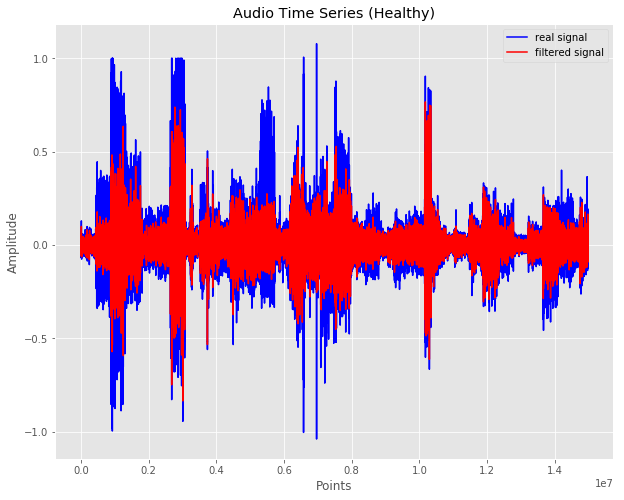

In [25]:
#Audio will be automatically resampled to the given rate (default sr=22050).
plt.figure(figsize=(10, 8))
plt.plot(array_healthy, label = 'real signal', c = 'b')
plt.plot(array_healthy_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series (Healthy)')
plt.grid(True)
plt.legend()
plt.savefig('img_healthy'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()


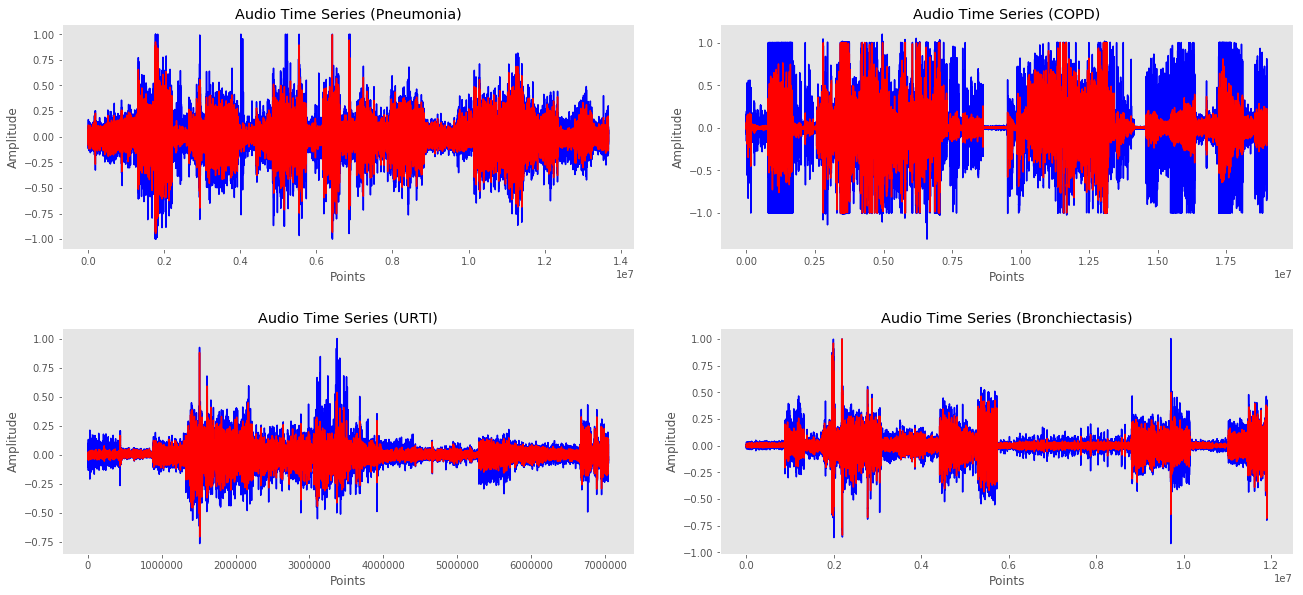

In [40]:
plt.subplot(221)
plt.plot(array_Pneumonia, label = 'real signal', c = 'b')
plt.plot(array_Pneumonia_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series (Pneumonia)')
plt.grid()


plt.subplot(222)
plt.plot(array_COPD, label = 'real signal', c = 'b')
plt.plot(array_COPD_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series (COPD)')
plt.grid()


plt.subplot(223)
plt.plot(array_URTI, label = 'real signal', c = 'b')
plt.plot(array_URTI_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series (URTI)')
plt.grid()



plt.subplot(224)
plt.plot(array_Bronchiectasis, label = 'real signal', c = 'b')
plt.plot(array_Bronchiectasis_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series (Bronchiectasis)')
plt.grid()

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=2.92, bottom=1.08, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

#plt.grid()
plt.savefig('img_unhealthy'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()



____

In [48]:
len_of_data = pd.DataFrame(columns=['Full/subsequence','Healthy', 'Pneumonia', 
                                    'COPD', 'URTI', 
                                    'Bronchiectasis'])

In [49]:
len_of_data.loc[len(len_of_data)] = ['full', len(array_healthy_filt), len(array_Pneumonia_filt),
                                    len(array_COPD_filt), len(array_URTI_filt),
                                    len(array_Bronchiectasis_filt)]

In [45]:
len_of_data

,Full/subsequence,Healthy,Pneumonia,COPD,URTI,Bronchiectasis
0,full,14983358,13670300,18975678,7047783,11906764


In [46]:
array_healthy_filt_split = split(array_healthy_filt, size = 10000)
array_Pneumonia_filt_split = split(array_Pneumonia_filt, size = 10000)
array_COPD_filt_split = split(array_COPD_filt, size = 10000)
array_URTI_filt_split = split(array_URTI_filt, size = 10000)
array_Bronchiectasis_filt_split = split(array_Bronchiectasis_filt, size = 10000)

In [50]:
len_of_data.loc[len(len_of_data)] = ['sub(10000)', len(array_healthy_filt_split), len(array_Pneumonia_filt_split),
                                    len(array_COPD_filt_split), len(array_URTI_filt_split),
                                    len(array_Bronchiectasis_filt_split)]

In [51]:
len_of_data

,Full/subsequence,Healthy,Pneumonia,COPD,URTI,Bronchiectasis
0,full,14983358,13670300,18975678,7047783,11906764
1,sub(10000),2996,2734,3795,1409,2381


______

In [ ]:
#Healthy	Pneumonia	COPD	URTI	Bronchiectasis

In [53]:
array_feature_healthy = feature_extraction(array_healthy_filt_split, 'Healthy')

quantity of feature_vector: 25
[ 1.31835938e-02 -3.19390454e+02  1.55500107e+01  2.20715332e+01
  5.73195831e+00 -5.69187543e+01  1.68529724e+02  4.14022713e+05
  4.97694873e+00  2.90672150e+01  2.54994962e+00  9.01418733e+00
  6.43700000e-01  4.82000000e-02 -6.12190513e-01  6.43800000e-01
  4.83000000e-02  1.59300000e+03  1.66400000e+03  4.34932532e-02
 -6.18890121e-03  5.18812980e-05  7.63012628e-09 -1.31900852e-02
  0.00000000e+00]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log2
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in multiply


In [54]:
array_feature_Pneumonia = feature_extraction(array_Pneumonia_filt_split,'Pneumonia')

quantity of feature_vector: 25
[ 2.00195312e-02 -2.97282568e+02  2.18836954e+01  2.79931641e+01
  4.05815201e+00 -1.00874159e+01  4.26483411e+02  9.59511077e+05
  2.83952887e+00  1.06545107e+01  2.92632848e+00  9.01757911e+00
  5.82000000e-01  3.67500000e-01 -6.10351852e-01  5.82100000e-01
  3.67600000e-01  1.11100000e+03  1.78900000e+03  4.80878917e-02
 -5.14333257e-05  5.91230652e-05  3.38211940e-09 -3.20618837e-03
  1.00000000e+00]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log2
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in multiply


In [55]:
array_feature_COPD = feature_extraction(array_COPD_filt_split,'COPD')

quantity of feature_vector: 25
[ 1.66015625e-02 -2.67552515e+02  1.65206826e+01  2.96081543e+01
  9.09326944e+00  1.29387458e+01  4.47317639e+02  9.98616683e+05
  2.74947312e+00  1.01118255e+01  3.03066701e+00  9.03091681e+00
  2.17100000e-01  1.05200000e-01 -4.79057913e-01  2.17200000e-01
  1.05300000e-01  1.20900000e+03  1.24100000e+03  6.99589764e-02
  2.09670248e-02  7.15319820e-05 -3.14814557e-09  1.90240468e-02
  2.00000000e+00]


In [56]:
array_feature_URTI = feature_extraction(array_URTI_filt_split,'URTI')

quantity of feature_vector: 25
[ 1.70898438e-02 -2.72791357e+02  8.47817349e+01  7.75195312e+01
  2.59480619e+00 -4.13509801e+01  2.76071804e+02  6.34479667e+05
  3.79737168e+00  1.76804741e+01  3.64880714e+00  8.99890605e+00
  5.60200000e-01  7.08600000e-01 -8.33969714e-01  5.60300000e-01
  7.08700000e-01  2.66000000e+03  1.43900000e+03  2.12572137e-02
 -2.35373913e-03  7.90060007e-05 -3.11834188e-09  5.53505323e-04
  3.00000000e+00]


In [57]:
array_feature_Bronchiectasis = feature_extraction(array_Bronchiectasis_filt_split,'Bronchiectasis')

quantity of feature_vector: 25
[ 8.34960938e-02 -3.80936157e+02  1.52691240e+02  2.22330322e+02
  1.13630826e-01  1.64773296e+00  1.71288001e+02  3.71965774e+05
  5.23486173e+00  3.22187660e+01  4.33622465e+00  8.62562414e+00
  2.62200000e-01  2.87100000e-01  1.13821226e+01  2.62300000e-01
  2.87200000e-01  7.81000000e+02  4.94000000e+02  1.93556708e-02
  1.32186590e-04  2.27741801e-05 -3.02681870e-09  1.40824198e-04
  4.00000000e+00]


_______

In [58]:
df = pd.DataFrame(np.asarray(array_feature_healthy).reshape(-1,25))

In [59]:
df2 = pd.DataFrame(np.asarray(array_feature_Pneumonia).reshape(-1,25))#, ignore_index=True )

In [60]:
df3 = pd.DataFrame(np.asarray(array_feature_COPD).reshape(-1,25))

In [61]:
df4 = pd.DataFrame(np.asarray(array_feature_URTI).reshape(-1,25))

In [62]:
df5 = pd.DataFrame(np.asarray(array_feature_Bronchiectasis).reshape(-1,25))

______

In [63]:
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.dropna()
from sklearn.utils import shuffle
data = shuffle(df)

In [64]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
984,0.014648,-260.654224,22.353745,27.993164,13.679393,26.188465,76.607397,1.818690e+05,7.871496,70.332208,...,0.1267,0.0224,1831.0,2160.0,0.088863,-0.004382,0.000076,1.741709e-08,-0.008077,0.0
10167,0.018555,-204.925781,18.527213,26.378174,49.386549,179.605701,346.538948,8.052698e+05,3.242149,13.321998,...,0.0001,0.3245,2065.0,3145.0,0.128734,-0.016640,0.000149,-2.907036e-10,-0.014942,3.0
10509,0.014648,-306.094043,16.084441,25.301514,5.446571,-0.569604,131.320527,3.224534e+05,5.750812,38.263147,...,0.9485,0.0883,1917.0,2024.0,0.049983,0.001131,0.000055,-8.848950e-09,-0.000443,3.0
6754,0.003906,-115.420691,10.046580,15.073242,567.651452,-1365.751911,36.422882,8.779715e+04,11.549469,149.538192,...,0.4402,0.9022,4064.0,2545.0,0.250248,-0.103138,0.000241,2.095734e-08,-0.157924,2.0
10904,0.017090,-236.915015,15.830223,22.071533,62.693713,-75.600648,507.277562,1.104494e+06,2.524196,8.842367,...,1.0000,0.3149,3235.0,1440.0,0.108193,-0.016092,0.000147,1.846119e-08,0.005605,3.0


____

# Machine Learning

____

In [148]:
target = data[24]
features = data.drop([24], axis=1)

In [149]:
target

984      0.0
10167    3.0
10509    3.0
6754     2.0
10904    3.0
        ... 
8343     2.0
8515     2.0
12643    4.0
1832     0.0
6702     2.0
Name: 24, Length: 13313, dtype: float64

In [150]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
984,0.014648,-260.654224,22.353745,27.993164,13.679393,26.188465,76.607397,1.818690e+05,7.871496,70.332208,...,-0.222717,0.1267,0.0224,1831.0,2160.0,0.088863,-0.004382,0.000076,1.741709e-08,-0.008077
10167,0.018555,-204.925781,18.527213,26.378174,49.386549,179.605701,346.538948,8.052698e+05,3.242149,13.321998,...,-0.886065,0.0001,0.3245,2065.0,3145.0,0.128734,-0.016640,0.000149,-2.907036e-10,-0.014942
10509,0.014648,-306.094043,16.084441,25.301514,5.446571,-0.569604,131.320527,3.224534e+05,5.750812,38.263147,...,-0.638562,0.9485,0.0883,1917.0,2024.0,0.049983,0.001131,0.000055,-8.848950e-09,-0.000443
6754,0.003906,-115.420691,10.046580,15.073242,567.651452,-1365.751911,36.422882,8.779715e+04,11.549469,149.538192,...,-1.360067,0.4402,0.9022,4064.0,2545.0,0.250248,-0.103138,0.000241,2.095734e-08,-0.157924
10904,0.017090,-236.915015,15.830223,22.071533,62.693713,-75.600648,507.277562,1.104494e+06,2.524196,8.842367,...,-0.256303,1.0000,0.3149,3235.0,1440.0,0.108193,-0.016092,0.000147,1.846119e-08,0.005605


In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                   shuffle = True)

______

In [153]:
from collections import Counter

Counter(target)

Counter({0.0: 2995, 3.0: 1409, 2.0: 3795, 1.0: 2733, 4.0: 2381})

In [154]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [155]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
5179,0.015137,-188.151270,12.797931,19.918213,125.586374,15.223934,137.210160,338717.784336,5.593713,36.282229,...,0.5055,0.4106,1813.0,1374.0,0.230968,0.002216,0.000265,-9.492134e-09,0.027188,1.0
5481,0.017578,-282.424414,22.521765,31.761475,8.855267,9.342965,283.859494,675030.592979,3.665399,16.534401,...,0.5346,0.4522,2612.0,1108.0,0.047575,-0.005271,0.000067,9.326994e-09,0.003897,1.0
8473,0.032715,-320.370264,31.079960,57.601318,1.509633,16.695665,364.169881,834154.391586,3.157619,12.732141,...,0.0675,0.7535,2040.0,1592.0,0.019909,-0.001962,0.000044,1.365965e-09,-0.000286,2.0
12750,0.025391,-201.892749,26.446148,39.836426,23.616188,52.493453,131.264587,314064.702067,5.834694,39.333405,...,0.8300,0.3234,1285.0,1366.0,0.108868,-0.006264,0.000186,-1.437855e-08,-0.003871,4.0
865,0.013672,-267.776855,19.121039,26.378174,14.361671,9.518071,241.581188,581683.519735,4.040766,19.723797,...,0.9469,0.8129,1368.0,4065.0,0.106308,0.004539,0.000079,-1.888499e-08,-0.005104,0.0


In [156]:
len_of_data

,Full/subsequence,Healthy,Pneumonia,COPD,URTI,Bronchiectasis
0,full,14983358,13670300,18975678,7047783,11906764
1,sub(10000),2996,2734,3795,1409,2381


In [157]:
# separate minority and majority classes
healthy = X[X[24]==0]
Pneumonia = X[X[24]==1]
COPD = X[X[24]==2]
URTI = X[X[24]==3]
Bronchiectasis = X[X[24]==4]

In [158]:
# upsample minority
Pneumonia_upsampled = resample(Pneumonia,
                          replace=True, # sample with replacement
                          n_samples=len(COPD), # match number in majority class
                          random_state=42) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([healthy, patients_upsampled])

In [159]:
Healthy_upsampled = resample(healthy,
                          replace=True, # sample with replacement
                          n_samples=len(COPD), # match number in majority class
                          random_state=42) # reproducible results

In [160]:
URTI_upsampled = resample(URTI,
                          replace=True, # sample with replacement
                          n_samples=len(COPD), # match number in majority class
                          random_state=42) # reproducible results

In [161]:
Bronchiectasis_upsampled = resample(Bronchiectasis,
                          replace=True, # sample with replacement
                          n_samples=len(COPD), # match number in majority class
                          random_state=42) # reproducible results

In [162]:
# # combine majority and upsampled minority
Healthy_upsampled = pd.concat([healthy, Healthy_upsampled])
Pneumonia_upsampled = pd.concat([Pneumonia, Pneumonia_upsampled])
URTI_upsampled = pd.concat([URTI, URTI_upsampled])
Bronchiectasis_upsampled = pd.concat([Bronchiectasis, Bronchiectasis_upsampled])

In [163]:
Healthy_upsampled[24].value_counts()

0.0    4798
Name: 24, dtype: int64

In [164]:
Pneumonia_upsampled[24].value_counts()

1.0    4603
Name: 24, dtype: int64

In [165]:
URTI_upsampled[24].value_counts()

3.0    3640
Name: 24, dtype: int64

In [166]:
Bronchiectasis_upsampled[24].value_counts()

4.0    4306
Name: 24, dtype: int64

In [168]:
y_train = Healthy_upsampled[24].append( Pneumonia_upsampled[24])


In [169]:
y_train = y_train.append( URTI_upsampled[24])

y_train = y_train.append( Bronchiectasis_upsampled[24])

In [171]:
X_train = Healthy_upsampled.drop([24], axis=1).append( Pneumonia_upsampled.drop([24], axis=1))
X_train =X_train.append(URTI_upsampled.drop([24], axis=1))
X_train =X_train.append(Bronchiectasis_upsampled.drop([24], axis=1))


In [174]:
y_train = y_train.append( df3[24])
X_train = X_train.append(df3.drop([24], axis=1))

In [175]:
from collections import Counter

Counter(y_train)

Counter({0.0: 4798, 1.0: 4603, 3.0: 3640, 4.0: 4306, 2.0: 3795})

In [178]:
X_train.shape, y_train.shape

((21142, 24), (21142,))

In [191]:
y_train

865     0.0
2802    0.0
1020    0.0
2538    0.0
1077    0.0
       ... 
3790    2.0
3791    2.0
3792    2.0
3793    2.0
3794    2.0
Name: 24, Length: 21142, dtype: float64

In [192]:
X = pd.concat([X_train, y_train], axis=1)

In [193]:
X = shuffle(X)

In [195]:
y_train = X[24]
X_train = X.drop([24], axis=1)


_____

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [197]:
scaler = StandardScaler()

In [198]:
from sklearn.pipeline import Pipeline

In [199]:
pipe = []
pipe.append(('scaler', scaler))
pipe.append(('lr', LogisticRegression()))
model = Pipeline(pipe)

In [200]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [201]:
from sklearn.metrics import recall_score
recall_score(y_test, model.predict(X_test), average='macro') 

0.5277294551620711

In [202]:
from sklearn.metrics import accuracy_score,f1_score,precision_score

In [203]:
print('TRAIN recall:', recall_score(y_train, model.predict(X_train), average='micro'  ))
print('TEST recall:', recall_score(y_test, model.predict(X_test) , average='micro' ))
print('TRAIN accuracy_score:', accuracy_score(y_train, model.predict(X_train))  )
print('TEST accuracy_score:', accuracy_score(y_test, model.predict(X_test))  )
print('TRAIN f1_score:',f1_score(y_train, model.predict(X_train), average='micro')  )
print('TEST f1_score:', f1_score(y_test, model.predict(X_test), average='micro')  )
print('TRAIN precision_score:',precision_score(y_train, model.predict(X_train), average='micro')  )
print('TEST precision_score:', precision_score(y_test, model.predict(X_test), average='micro')  )

TRAIN recall: 0.5385015608740895
TEST recall: 0.5398097145718578
TRAIN accuracy_score: 0.5385015608740895
TEST accuracy_score: 0.5398097145718578
TRAIN f1_score: 0.5385015608740895
TEST f1_score: 0.5398097145718578
TRAIN precision_score: 0.5385015608740895
TEST precision_score: 0.5398097145718578


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [205]:
models = {
    'lr':  Pipeline([('scaler',StandardScaler()), ('lr', LogisticRegression(solver='saga', l1_ratio=1))]),
    'rf': Pipeline([('scaler',StandardScaler()), ('rf', RandomForestClassifier())]),
    'gb': Pipeline([('scaler',StandardScaler()), ('gb', GradientBoostingClassifier())]),
    'xgb': Pipeline([('scaler',StandardScaler()), ('xgb', XGBClassifier())])#,
#     'svc': Pipeline([('scaler',StandardScaler()), ('svc', SVC())])#,
#     #'knn': Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsRegressor())]),
#     'lsvc': Pipeline([('scaler',StandardScaler()), ('lsvc', LinearSVC())]), 
#     'gnb': Pipeline([('scaler',StandardScaler()), ('gnb', GaussianNB())])    
}

In [206]:
parameters = {
    'lr': {'lr__penalty': ['l1', 'l2', 'elasticnet'],
        'lr__C':  [0.001, 0.01, 0.1, 1.0, 10.0, 100.]},
    
    'rf': {#'rf__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
          'rf__max_depth': [int(x) for x in np.linspace(10, 50, num = 10)],
          'rf__min_samples_split': np.arange(2,10)},
    
    'gb': {'gb__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
          'gb__n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
          #'gb__max_depths': np.linspace(1, 32, 32, endpoint=True),
          'gb__min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)},
    
    'xgb': {'xgb__max_depth':range(3,10,2),
             'xgb__min_child_weight':range(1,6,2)},
    
    'svc': {'svc__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.],
           'svc__kernel': [ 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
           }#,
    
    #'knn': {'knn__n_neighbors': np.arange(5,30)}
    
#     'lsvc': {'lsvc__penalty': ['l1', 'l2'],
#             'lsvc__loss': ['hinge', 'squared_hinge'],
#             'lsvc__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.]},
    
#     'gnb': {'gnb__var_smoothing': [1e-10, 1e-9, 1e-8,1e-7]}
}
    
    

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
for model in models.keys():
    print('model:', model)
    simplefilter(action='ignore')
    clf = GridSearchCV(models[model], parameters[model],cv=3, return_train_score=True)
    clf.fit(X_train, y_train)
    
    #clf = clf.best_model_
    
    print('____________________________________')
    try:
        print('TRAIN recall:', recall_score(y_train, clf.predict(X_train), average='micro')  )
        print('TEST recall:', recall_score(y_test, clf.predict(X_test), average='micro')  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN accuracy_score:', accuracy_score(y_train, clf.predict(X_train))  )
        print('TEST accuracy_score:', accuracy_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN f1_score:',f1_score(y_train, clf.predict(X_train), average='micro')  )
        print('TEST f1_score:', f1_score(y_test, clf.predict(X_test), average='micro')  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN precision_score:',precision_score(y_train, clf.predict(X_train), average='micro')  )
        print('TEST precision_score:', precision_score(y_test, clf.predict(X_test), average='micro')  )
    except ValueError:
        continue
    print('____________________________________')
    print('____________________________________')
    print('____________________________________')

model: lr
____________________________________
TRAIN recall: 0.5368460883549333
TEST recall: 0.5385578367551327
____________________________________
TRAIN accuracy_score: 0.5368460883549333
TEST accuracy_score: 0.5385578367551327
____________________________________
TRAIN f1_score: 0.5368460883549333
TEST f1_score: 0.5385578367551327
____________________________________
TRAIN precision_score: 0.5368460883549333
TEST precision_score: 0.5385578367551327
____________________________________
____________________________________
____________________________________
model: rf
____________________________________
TRAIN recall: 0.9977296376880144
TEST recall: 0.7451176765147721
____________________________________
TRAIN accuracy_score: 0.9977296376880144
TEST accuracy_score: 0.7451176765147721
____________________________________
TRAIN f1_score: 0.9977296376880144
TEST f1_score: 0.7451176765147721
____________________________________
TRAIN precision_score: 0.9977296376880144
TEST precision_sco

In [208]:
from sklearn.neighbors import KNeighborsRegressor

In [209]:
from sklearn.metrics import r2_score

In [210]:
neigh = KNeighborsRegressor(n_neighbors=3)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
neigh.fit(X_train_scaler, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [211]:
r2_score(y_train, neigh.predict(X_train_scaler)), r2_score(y_test, neigh.predict(X_test_scaler))

(0.9101362797672982, 0.11703071766950379)

In [212]:
from sklearn.svm import SVC

In [213]:
clf = SVC(gamma='auto')

In [214]:
clf.fit(X_train_scaler, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [215]:
print('TRAIN recall:', recall_score(y_train, clf.predict(X_train_scaler), average='micro')  )
print('TEST recall:', recall_score(y_test, clf.predict(X_test_scaler), average='micro')  )

TRAIN recall: 0.7138397502601457
TEST recall: 0.6887831747621432


In [216]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
parameter = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.]
           }

model = SVC(gamma='auto')
r = GridSearchCV(model, parameter, cv=3)
r.fit(X_train_scaler, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [217]:
r.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [218]:
print('TRAIN recall:', recall_score(y_train, r.predict(X_train_scaler), average='micro')  )
print('TEST recall:', recall_score(y_test, r.predict(X_test_scaler), average='micro')  )
print('TRAIN accuracy_score:', accuracy_score(y_train, r.predict(X_train))  )
print('TEST accuracy_score:', accuracy_score(y_test, r.predict(X_test))  )
print('TRAIN f1_score:',f1_score(y_train, r.predict(X_train), average='micro')  )
print('TEST f1_score:', f1_score(y_test, r.predict(X_test), average='micro')  )
print('TRAIN precision_score:',precision_score(y_train, r.predict(X_train), average='micro')  )
print('TEST precision_score:', precision_score(y_test, r.predict(X_test), average='micro'))

TRAIN recall: 0.8995837669094693
TEST recall: 0.7110665998998498
TRAIN accuracy_score: 0.17950052029136315
TEST accuracy_score: 0.2801702553830746
TRAIN f1_score: 0.17950052029136315
TEST f1_score: 0.2801702553830746
TRAIN precision_score: 0.17950052029136315
TEST precision_score: 0.2801702553830746
